## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
   
- Create a crosstab between the product `category` and the `isBestSeller` status.

In [2]:
x = pd.crosstab(df['category'], df['isBestSeller'])

- Are there categories where being a best-seller is more prevalent?

  *Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

#####  <font color='Blue'>The top <font color='Red'>3</font> most prevalent categories are : </font>

In [3]:
print( *list(((x[True] / (x[False] + x[True])).sort_values(ascending = False)).head(3).index), sep = "\n")

Grocery
Smart Home Security & Lighting
Health & Personal Care


2. **Statistical Tests**:

- Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

In [4]:
from scipy.stats import chi2_contingency

chi2_contingency(x)[:2]

(36540.20270061387, 0.0)

#####  <font color='Blue'> A p-value of <font color='Red'> 0.0</font> rejects the null hypothesis. Hence the best-seller distribution is correlated to the product category. .</font>

- Compute Cramér's V to understand the strength of association between best-seller status and category.

In [5]:
from scipy.stats.contingency import association

association(x)

0.1222829439760564

#####  <font color='Blue'> An association value of <font color='Red'> 0.12</font> indicates that the strengh of the correlation between 'category" and "isBestSeller is weak .</font>

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

#####  <font color='Blue'> Visualizing top <font color='Red'>10</font> BestSeller categories : </font>

<AxesSubplot: xlabel='category'>

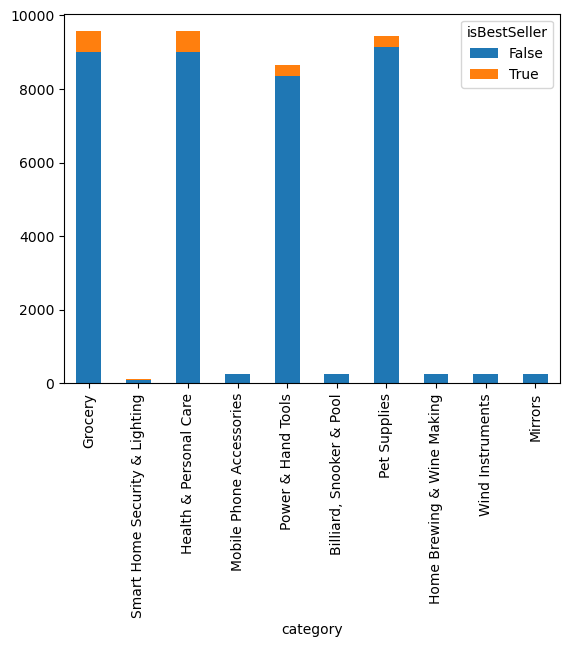

In [6]:
x.loc[list(((x[True] / (x[False] + x[True])).sort_values(ascending=False)).head(10).index)].plot(kind="bar", stacked=True)

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

In [7]:
q3, q1 = df['price'].quantile([0.25, 0.75])[0.75], df['price'].quantile([0.25, 0.75])[0.25]
iqr = q3 - q1
l_bound , u_bound = q1 - 1.5 * iqr , q3 + 1.5 * iqr
df1 = df[(df['price'] >= l_bound) & (df['price'] <= u_bound)]

1. **Violin Plots**:

- Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.

<AxesSubplot: xlabel='price', ylabel='category'>

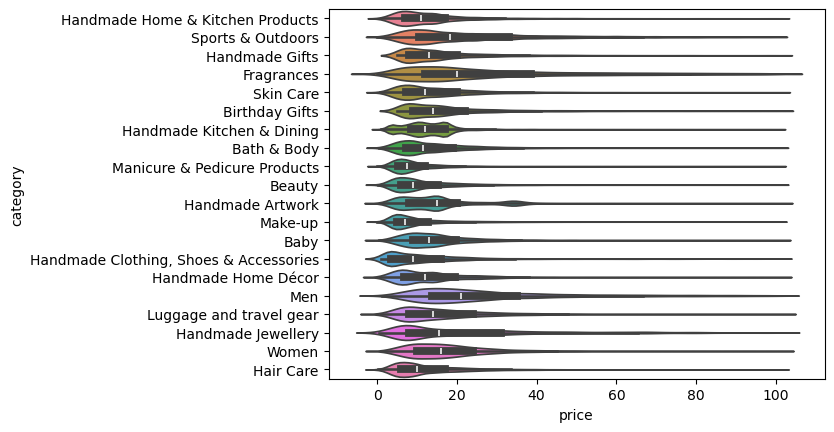

In [8]:
sns.violinplot(data=df1[df1['category'].isin(df1['category'].value_counts().sort_values(ascending=False).head(20).index)], y='category', x='price', hue='category')

- Which product category tends to have the highest median price? Don't filter here by top categories.

In [9]:
list(df.groupby('category')['price'].median().sort_values(ascending=False).head(1).index)[0]

'Laptops'

2. **Bar Charts**:

- Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

<AxesSubplot: xlabel='price', ylabel='category'>

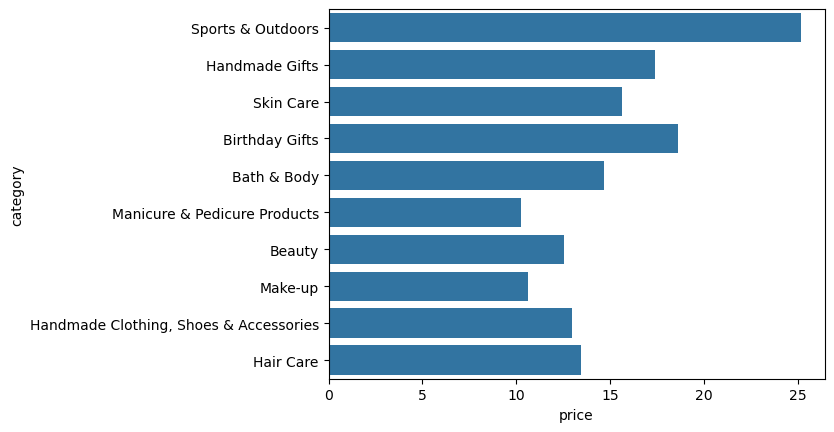

In [10]:
sns.barplot(data=df1[df1['category'].isin(df1['category'].value_counts().sort_values(ascending=False).head(10).index)],x='price', y='category', errorbar=None)

- Which product category commands the highest average price? Don't filter here by top categories.

In [11]:
list(df.groupby('category')['price'].mean().sort_values(ascending=False).head(1).index)[0]

'Laptops'

3. **Box Plots**:

- Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.

<AxesSubplot: xlabel='stars', ylabel='category'>

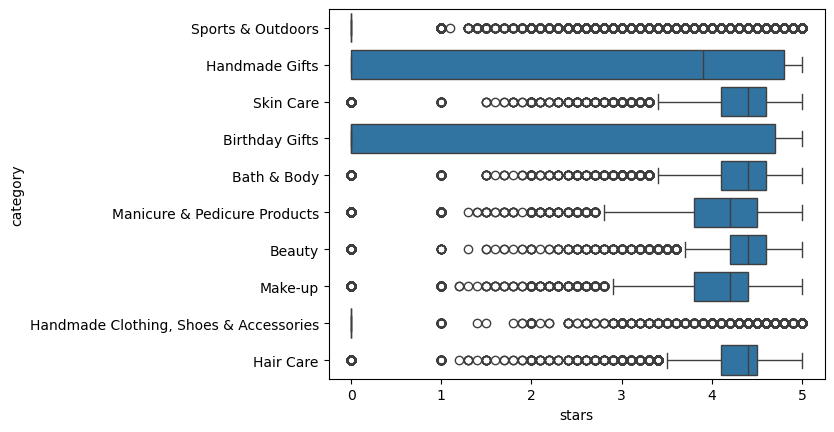

In [12]:
sns.boxplot(data=df1[df1['category'].isin(df1['category'].value_counts().sort_values(ascending=False).head(10).index)],x='stars', y='category')

- Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [13]:
list(df.groupby('category')['stars'].median().sort_values(ascending=False).head(1).index)[0]

'Computer Memory'

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:

- Calculate the correlation coefficient between `price` and `stars`.

In [14]:
abs(df1['price'].corr(df1['stars']))

0.07767299878181352

- Is there a significant correlation between product price and its rating?

No...The absolute value of 0.07 for Pearson's correlation coefficient indicates a fairly weak correlation between price and stars.

2. **Visualizations**:

- Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

<AxesSubplot: xlabel='stars', ylabel='price'>

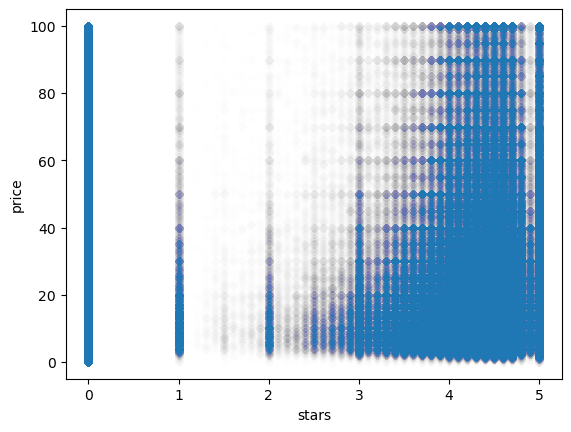

In [15]:
sns.scatterplot(data=df1, x='stars', y='price',alpha=0.004)

If we exclude 0, we notice a distribution closer to a gaussian distribution.

- Use a correlation heatmap to visualize correlations between all numerical variables.

<AxesSubplot: >

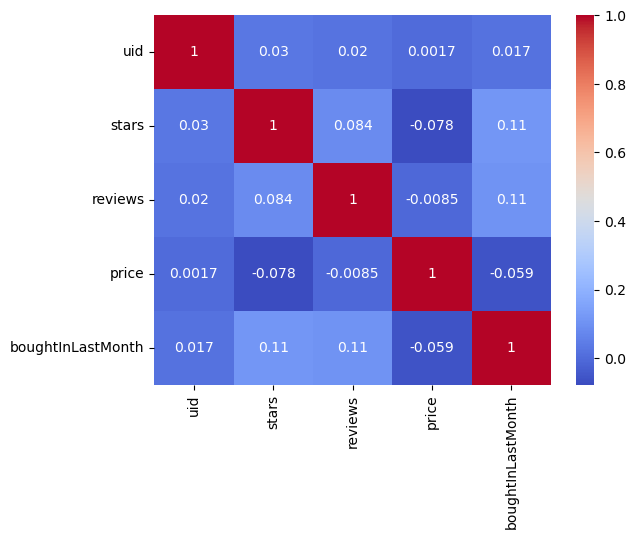

In [16]:
sns.heatmap(df1.select_dtypes('number').corr(), annot=True, cmap="coolwarm")

There is no linear correlation between numerical variables. All distinct pair of variables indicates a coeifficient of correlation close to 0. 

- Examine if product prices typically follow a normal distribution using a QQ plot. 

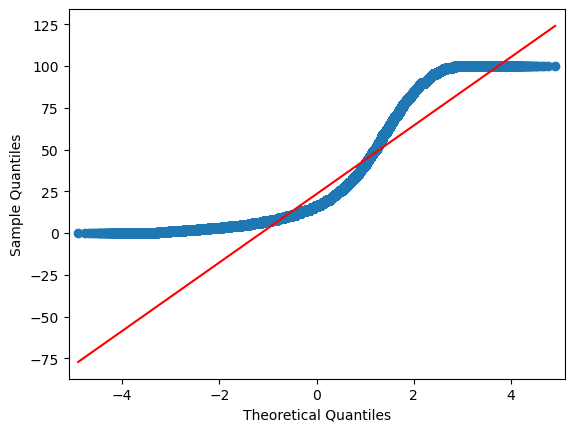

In [17]:
import statsmodels.api as sm

sm.qqplot(df1['price'], line='s');

Since the blue and the red graphs don't superimpose, it is safe to say that the product prices do not follow a normal distribution.